In [7]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

%matplotlib inline

In [8]:
import pandas as pd

df = pd.DataFrame({"A":[25,30,20,23,27,33,23,20,25,24],
                  "B":[31,30,34,30,28,31,30,31,32,30],
                  "C":[19,21,27,25,25,30,26,29,30,24],
                  "D":[18,25,16,19,20,20,25,22,23,17]})
df2 = pd.DataFrame({"A":[25,30,20,23,27,33,23,20,25,24,31,30,34,30,28,31,30,31,32,30,19,21,27,25,25,30,26,29,30,24,18,25,16,19,20,20,25,22,23,17]})

In [9]:
df2.describe()

,A
count,40.000000
mean,25.450000
std,4.824882
min,16.000000
25%,21.750000
50%,25.000000
75%,30.000000
max,34.000000


In [10]:
mu = 25.45
sigma = 4.8249
x = 35
prob = stats.norm.cdf(x, mu, sigma)

print("{0}분 이상 걸리는 A/S 작업 비율: {1:.1f}%".format(x,(1-prob)*100))

35분 이상 걸리는 A/S 작업 비율: 2.4%


In [11]:
# n의 수
n = 5
for i in range(n+1):
    # 이항분포 Probability Mass Function
    prob = stats.binom.pmf(k=i, n=n, p=0.05)
    print("P(X={0}) = {1:.3f}".format(i,prob))

P(X=0) = 0.774
P(X=1) = 0.204
P(X=2) = 0.021
P(X=3) = 0.001
P(X=4) = 0.000
P(X=5) = 0.000


In [13]:
# Paired t-test
df = pd.DataFrame({"before":[30,13,8,17,28,26,16,45,21,5],
                  "after":[20,7,25,4,31,9,15,25,1,10]})
df.head()

,before,after
0,30,20
1,13,7
2,8,25
3,17,4
4,28,31


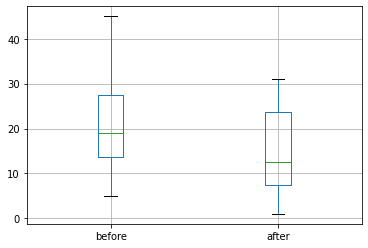

In [14]:
df.boxplot(['before', 'after'])

In [15]:
# Paired t-test
t_result = stats.ttest_rel(df['before'], df['after'])

# Paired t-test t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# Paired t-test t값 p값 출력
print("Paired t-test")
print('t검정 통계량 = %.3f, pvalue = %.3f'% t_result)

Paired t-test
t검정 통계량 = 1.611, pvalue = 0.142


In [23]:
df_raw = pd.DataFrame({"before":[30,13,8,17,28,26,16,45,21,5],
                  "after":[20,7,25,4,31,9,15,25,1,10]})
df_raw.head()

,before,after
0,30,20
1,13,7
2,8,25
3,17,4
4,28,31


In [24]:
sns.scatterplot(data=df_raw, x="X", y="Y")

ValueError: Could not interpret input 'X'

In [26]:
# 선형회귀모델
from sklearn.linear_model import LinearRegression

# 선형모델 formula(y ~ x1 + x2 + ...)
import statsmodels.formula.api as smf

# 선형회귀분석:formula(y ~ X1 + X2 + ...) 이용. 상수항(Intercept)은 자동으로 추가됨
formula = "before ~ after"
model = smf.ols(formula, data = df_raw)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 before   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     1.469
Date:                Mon, 16 Nov 2020   Prob (F-statistic):              0.260
Time:                        09:32:02   Log-Likelihood:                -37.531
No. Observations:                  10   AIC:                             79.06
Df Residuals:                       8   BIC:                             79.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.1295      6.672      2.118      0.0

/home/piai/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [21]:
# 카이제곱 검정
df = pd.DataFrame({"work_1":[182,213,203],
                  "work_2":[154,138,110]},
                 index=['HSG28','SS400','SPA-H'])

In [22]:
from scipy.stats import chi2_contingency

# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df)

# chi-sqaure test 결과 출력
print(" chi2 test ")
print(' chi2: {0:0.3f}'.format(chi))
print(' p-value: {0:0.3f}'.format(pval))
print(' degree of freedom: {}'.format(dof))
print(' expected value: \n{}'.format(expected.round(1)))

 chi2 test 
 chi2: 7.878
 p-value: 0.019
 degree of freedom: 2
 expected value: 
[[200.9 135.1]
 [209.9 141.1]
 [187.2 125.8]]
